In [1]:
import pandas as pd
import numpy as np
import gzip
import seaborn as sns

In [2]:
MAX_ROWS=100

# Чтение данных
## В массив

In [3]:
def count_lines(filename):
    with gzip.open(filename, mode='rb') as fp:
        for i, l in enumerate(fp):
                pass
        return min(MAX_ROWS, i + 1)

In [4]:
#Считаем число строк в файле
total_lines = count_lines('data/train.txt.gz')

In [5]:
#создаём место для хранения данных
data = np.zeros([total_lines, 701], dtype=np.float32)

In [6]:
def line_to_data(line, row_num, data):
    line_arr = line.split()
    row_id = line_arr[0]
    qid = line_arr[1][4:]
    features = line_arr[2:]
    
    data[row_num, 0] = row_id
    data[row_num, 1] = qid
    
    for f in features:
        f_splited = f.split(':')
        f_id = int(f_splited[0])
        f_value = float(f_splited[1])
        data[row_num, f_id+1] = f_value
    
    #print(qid)

In [7]:
row_num=0
with gzip.open('data/train.txt.gz', mode='rb') as fp:
    line = fp.readline().decode("utf-8")
    while line and row_num<MAX_ROWS:
        line_to_data(line,row_num, data)
        line = fp.readline().decode("utf-8")
        row_num+=1

In [8]:
columns_names = ['target', 'qid'] + ['f{}'.format(i) for i in range(1,700)]

In [9]:
pd_data = pd.DataFrame(data, columns=columns_names)

In [33]:
pd_data[pd_data['qid']==2]

,target,qid,f1,f2,f3,f4,f5,f6,f7,f8,...,f690,f691,f692,f693,f694,f695,f696,f697,f698,f699
1,1.0,2.0,0.69466,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,...,0.436210,0.00000,0.00000,0.56675,0.42868,0.93979,0.0,0.046567,0.00000,0.331660
2,0.0,2.0,0.69466,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,...,0.517750,0.00000,0.00000,0.60493,0.61661,0.00000,0.0,0.046567,0.00000,0.054559
3,1.0,2.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,...,0.477390,0.00000,0.00000,0.45516,0.62137,0.00000,0.0,0.046567,0.00000,0.257380
4,0.0,2.0,0.69466,0.0,0.0,0.0,0.0,0.0,0.72026,0.00000,...,0.233560,0.00000,0.79836,0.74476,0.63885,0.00000,0.0,0.046567,0.95019,0.918180
5,1.0,2.0,0.69466,0.0,0.0,0.0,0.0,0.0,0.72026,0.00000,...,0.212190,0.00000,0.79836,0.54263,0.83300,0.00000,0.0,0.046567,0.00000,0.580950
6,0.0,2.0,0.69466,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,...,0.431110,0.00000,0.00000,0.37610,0.15473,0.00000,0.0,0.046567,0.00000,0.747590
7,1.0,2.0,0.69466,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,...,0.091483,0.00000,0.00000,0.66763,0.82181,0.00000,0.0,0.046567,0.00000,0.123190
8,1.0,2.0,0.69466,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,...,0.600460,0.00000,0.00000,0.57230,0.51449,0.00000,0.0,0.046567,0.61889,0.538870
9,0.0,2.0,0.69466,0.0,0.0,0.0,0.0,0.0,0.72026,0.67074,...,0.233770,0.00000,0.79836,0.74476,0.63840,0.00000,0.0,0.046567,0.95019,0.920190
10,1.0,2.0,0.74142,0.0,0.0,0.0,0.0,0.0,0.00000,0.00000,...,0.308390,0.94150,0.00000,0.67381,0.56087,0.98705,0.0,0.046567,0.61889,0.038934


In [26]:
with gzip.open('data/test.txt.gz', mode='rb') as fp:
    line = fp.readline().decode("utf-8")
    print(line)

-1 qid:19945 1:0.74142 6:0.90265 7:0.8087 8:0.79522 9:0.80003 11:0.56756 12:0.064688 17:0.073248 20:0.93213 21:0.12578 27:0.18431 28:0.75984 30:0.75616 32:0.80374 34:0.46928 36:0.51765 37:0.46008 39:0.42788 41:0.9826 43:0.93182 60:0.99684 66:0.18497 69:0.30373 70:0.52142 74:0.94942 77:0.89376 78:0.85719 81:0.77314 83:0.89759 85:0.98183 91:0.74024 96:0.9819 98:0.32739 100:0.87782 101:0.84892 106:0.81369 108:0.78162 111:0.85131 114:0.9235 117:0.85842 120:0.95352 121:0.99884 122:0.56699 123:0.76794 124:0.91751 126:0.5439 127:0.69889 129:0.97271 133:0.91559 135:0.93894 140:0.45073 145:0.77475 146:0.42512 147:0.49064 149:0.95668 150:0.85673 151:0.98853 152:0.88489 153:0.95202 154:0.93017 155:0.66796 158:0.92355 159:0.7989 161:0.57391 162:0.71503 164:0.91417 165:0.88161 167:0.67808 169:0.85342 172:0.61216 173:0.15927 176:0.72929 177:0.37921 179:0.3318 181:0.93793 186:0.85566 187:0.86598 189:0.91859 191:0.82201 192:0.58598 195:0.91437 201:0.74086 202:0.87428 204:0.88737 206:0.81369 208:0.6429

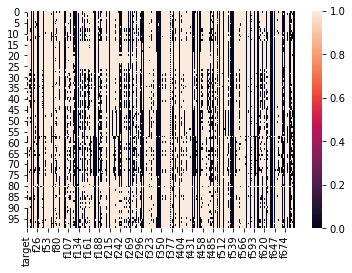

In [27]:
sns.heatmap(pd_data==0)

In [ ]:
(pd_data>0).sum()

In [ ]:
data

In [ ]:
#Обработать массив фичей
def features_to_dict(features):
    result = dict()
    for f in features:
        splited_feature = f.split(':')
        result[splited_feature[0]] = splited_feature[1]
    return result
    
#Обработать одну строку из файла   
def process_one_line(line):
    line_arr = line.split()
    obs = dict()
    obs['row_id'] = line_arr[0]
    obs['qid'] = line_arr[1][4:]
    features = features_to_dict(line_arr[2:])
    result = dict(obs, **features)
    return result

In [ ]:
observations = list()

In [ ]:
len(observations)

In [ ]:
observations[3]

In [ ]:
with gzip.open('data/train.txt.gz', mode='rb') as fp:
    line = fp.readline().decode("utf-8")
    while line:
        observations.append(process_one_line(line))
        line = fp.readline().decode("utf-8")

In [ ]:
observations

In [ ]:
pd.read_csv('data/train.txt.gz')

In [ ]:
%pip install --update pandas



In [ ]:
train

In [ ]:
train.loc[1]

In [ ]:
train.loc[2000:2010].apply(lambda x: str(x).split(' '), axis=1)

In [ ]:
train.loc[1000:1010].apply(lambda x: str(x).split(' '), axis=1)

In [ ]:
train.loc[100000:100010].apply(lambda x: str(x).split(' '), axis=1)

In [ ]:
train.apply(lambda x: str(x).split(' '), axis=1)

In [ ]:
len(train.loc[0][0])

In [ ]:
len(train.loc[1][0])

In [ ]:
len(train.loc[2][0])